# Getting to know a dataset

## Initial exploration

Exploratory Data Analysis, or EDA for short, is the process of cleaning and reviewing data to derive insights such as descriptive statistics and correlation and generate hypotheses for experiments. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
books = pd.read_csv('datasets/clean_books.csv')
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


Sumario de cuántos valores faltantes hay

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


¿Cuántos valores tengo en columnas categóricas?

In [4]:
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

Sumario de columnas numéricas

In [5]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


Distribución de datos numéricos

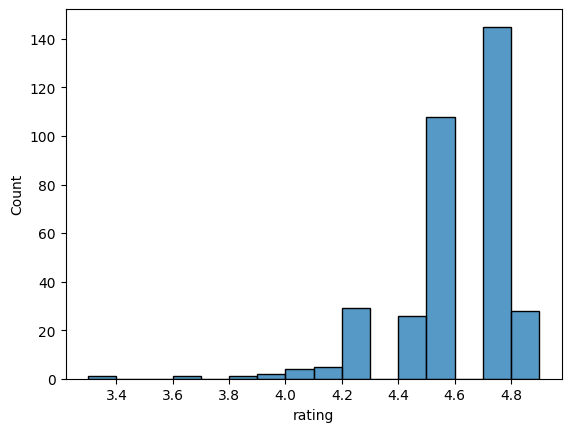

In [6]:
sns.histplot(data=books, x='rating', binwidth=.1)
plt.show() 

## Data validation

understand whether data types and ranges are as expected

In [7]:
# Checar el tipo
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [8]:
# Cambiar el tipo
books['year'] = books['year'].astype(int)
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [9]:
# comparing values in a column to a list of expected values 
books['genre'].isin(['Fiction', 'Non Fiction'])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [10]:
other = ~books['genre'].isin(['Fiction', 'Non Fiction'])  #tiene que pasarse como lista, aunque sea 1

In [11]:
# Filtering the DataFrame for only values that are in our list
books[other].head()

,name,author,rating,year,genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens
26,Baby Touch and Feel: Animals,DK,4.6,2015,Childrens
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,2017,Childrens
37,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,2011,Childrens
53,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,2015,Childrens


In [12]:
books.select_dtypes('number').head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


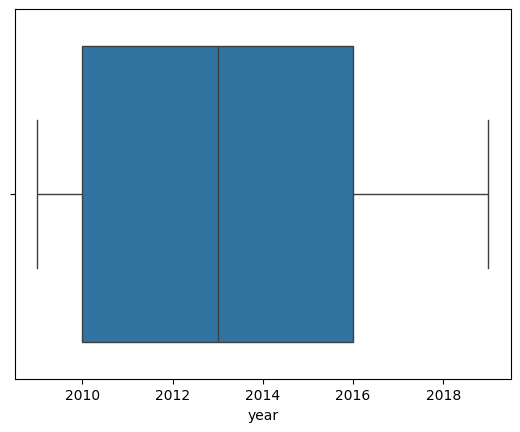

In [13]:
# distribución de una variable
sns.boxplot(data=books, x='year')
plt.show()

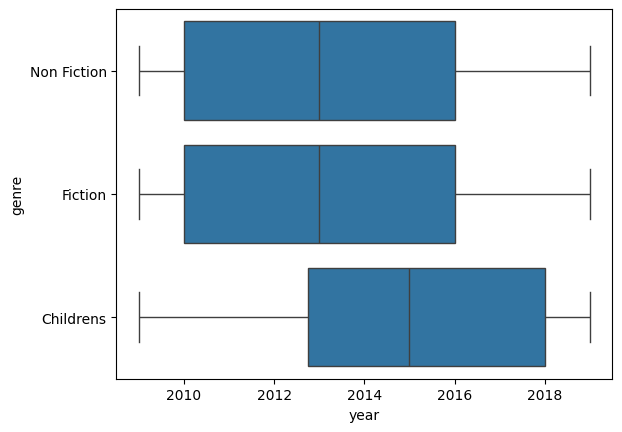

In [14]:
# distribución de dos variables
sns.boxplot(data=books, x='year', y='genre')
plt.show()

## Data summarization

In [15]:
# mean, count, sum, min, max, var, std

books[['genre','rating','year']].groupby('genre').mean()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [16]:
# Cuando es más de una función, se usa .agg()

In [17]:
books[['rating','year']].agg(['mean','std'])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [18]:
books[['genre','rating','year']].groupby('genre').agg(['mean','std'])

rating                   year          
                 mean       std         mean       std
genre                                                 
Childrens    4.780000  0.122370  2015.075000  3.300253
Fiction      4.570229  0.281123  2013.022901  3.089600
Non Fiction  4.598324  0.179411  2013.513966  3.327376

In [19]:
# Specifying aggregations for columns

books.agg({'rating':['mean','std'],'year':['median']})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [20]:
books[['genre','rating','year']].groupby('genre').agg({'rating':['mean','std'],'year':['median']})

rating              year
                 mean       std  median
genre                                  
Childrens    4.780000  0.122370  2015.0
Fiction      4.570229  0.281123  2013.0
Non Fiction  4.598324  0.179411  2013.0

In [21]:
# Named summary columns

books.groupby('genre').agg(
    mean_ratings=('rating','mean'),
    std_ratings=('rating','std'),
    median_year=('year','median')
)

'''
 We can create named columns with our desired aggregations by using the .agg() 
 and creating named tuples inside it. Each named tuple should include a column name 
 followed by the aggregating function to apply to that column.
'''

'\n We can create named columns with our desired aggregations by using the .agg() \n and creating named tuples inside it. Each named tuple should include a column name \n followed by the aggregating function to apply to that column.\n'

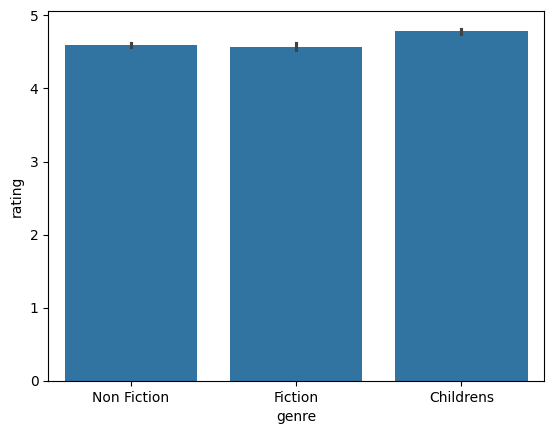

In [22]:
# Visualizing categorical summaries

sns.barplot(data=books, x='genre', y='rating')
plt.show()

In Seaborn, bar plots also show a 95% confidence interval for the mean as a vertical line on the top of each bar. El punto donde toca la línea dentro de la barra sería lo menos que podría ocurrir, y el punto fuera sería lo máximo.

# Data Cleaning and Imputation

In [23]:
salaries = pd.read_csv('datasets/ds_salaries_clean.csv')

In [24]:
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


There are various approaches to handle missing data. One rule of thumb is to remove observations if they amount to five percent or less of all values. If we have more missing values, instead of dropping them, we can replace them with a summary statistic like the mean, median, or mode, depending on the context. This is known as imputation. Alternatively, we can impute by sub-groups.

In [25]:
# Calculate missing values threshold 
threshold = len(salaries) * 0.05
print(threshold)

30.35


In [26]:
# Finding which columns is safe to drop values
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)

# Dropping missing values
salaries.dropna(subset=cols_to_drop, inplace=True)

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')


In [27]:
# Imputing a summary statistic
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
print(cols_with_missing_values)

for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0])

Index([], dtype='object')


In [28]:
# Creating a dictionary for imputation
salaries_dict = salaries.groupby('Experience')['Salary_USD'].median().to_dict()
print(salaries_dict)

{'Entry': 53948.0, 'Executive': 163694.5, 'Mid': 73465.0, 'Senior': 129380.0}


In [29]:
# Imputing by sub-group
salaries['Salary_USD'] = salaries['Salary_USD'].fillna(salaries['Experience'].map(salaries_dict))

In [32]:
# Select non-numerica data
salaries.select_dtypes('object').head()

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


In [33]:
# Frequency of values
salaries['Designation'].value_counts()

Designation
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                

In [34]:
# Count unique job titles
salaries['Designation'].nunique()

50

In [35]:
# Extracting value from categories
salaries['Designation'].str.contains('Scientist')

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [36]:
# Finding multiple phrases in strings
salaries['Designation'].str.contains('Machine Learning|AI')

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [38]:
# Finding strings that start with X
salaries['Designation'].str.contains('^Data')

0       True
1      False
2      False
3      False
4      False
       ...  
602     True
603     True
604     True
605     True
606    False
Name: Designation, Length: 607, dtype: bool

**Create a filter for job titles**

In [40]:
# 1. Create a list of categories that will become the values of the new column

job_categories = ['Data Science','Data Analytics', 'Data Engineering', 'Machine Learning', 'Managerial', 'Consultant']

In [41]:
# 2. Create variables containing the filters

data_science = "Data Scientist|NLP"
data_analyst = 'Analyst|Analytics'
data_engineer = 'Data Engineer|ETL|Architect|Infrastructure'
ml_engineer = 'Machine Learning|ML|Big Data|AI'
manager = 'Manager|Head|Director|Lead|Principal|Staff'
consultant = 'Consultant|Freelance'

In [42]:
# 3. Create a list with the range of conditions

conditions = [
    (salaries['Designation'].str.contains(data_science)),
    (salaries['Designation'].str.contains(data_analyst)),
    (salaries['Designation'].str.contains(data_engineer)),
    (salaries['Designation'].str.contains(ml_engineer)),
    (salaries['Designation'].str.contains(manager)),
    (salaries['Designation'].str.contains(consultant))
]

In [44]:
# 4. Create the new column 

salaries['Job_Category'] = np.select(conditions, job_categories, default='Other')

In [45]:
# 5. Previewing job categories

print(salaries[['Designation','Job_Category']].head())

                  Designation      Job_Category
0              Data Scientist      Data Science
1  Machine Learning Scientist  Machine Learning
2           Big Data Engineer  Data Engineering
3        Product Data Analyst    Data Analytics
4   Machine Learning Engineer  Machine Learning


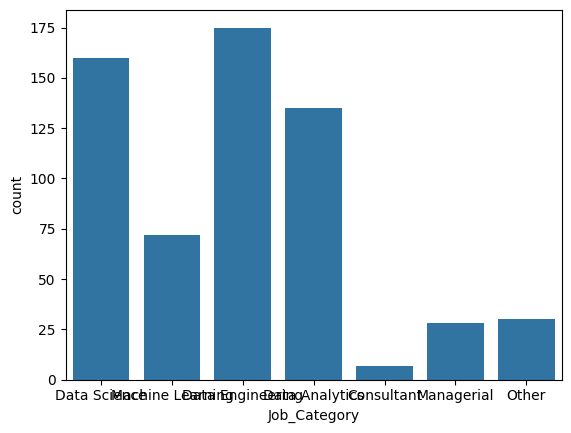

In [47]:
# Visualizing new column
sns.countplot(data=salaries, x='Job_Category')
plt.show()

In [50]:
planes = pd.read_csv('datasets/planes.csv')

non_numeric = planes.select_dtypes('object')

for column in non_numeric.columns:
    print(f'Column {column} has {planes[column].nunique()} unique values.')

Column Airline has 8 unique values.
Column Date_of_Journey has 44 unique values.
Column Source has 5 unique values.
Column Destination has 6 unique values.
Column Route has 126 unique values.
Column Dep_Time has 221 unique values.
Column Arrival_Time has 1334 unique values.
Column Duration has 367 unique values.
Column Total_Stops has 5 unique values.
Column Additional_Info has 10 unique values.


In [52]:
planes[['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Total_Stops']].head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops
0,9/06/2019,09:25,04:25 10 Jun,19h,2 stops
1,12/05/2019,18:05,23:30,5h 25m,1 stop
2,01/03/2019,16:50,21:35,4h 45m,1 stop
3,24/06/2019,09:00,11:25,2h 25m,non-stop
4,12/03/2019,18:55,10:25 13 Mar,15h 30m,1 stop


In [57]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "10h|11h|12h|13h|14h|15h|16h"

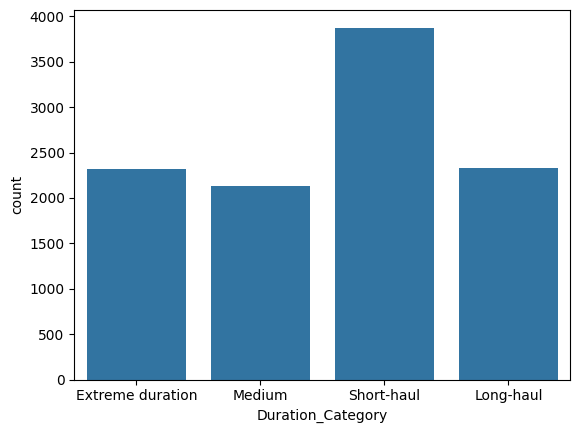

In [60]:
# Create conditions for values in flight_categories to be created
conditions = [
    planes["Duration"].str.contains(short_flights).to_numpy(dtype=bool),
    planes["Duration"].str.contains(medium_flights).to_numpy(dtype=bool),
    planes["Duration"].str.contains(long_flights).to_numpy(dtype=bool),
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, flight_categories, default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

In [61]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
 8   Job_Category          607 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 42.8+ KB


In [63]:
# Removing unwanted characters
# df['col'] = df['col'].str.replace(',' , '')

# Converting to other types
# df['col'] = df['col'].astype(int)

# Adding summary statistics into a Data Frame
salaries.groupby('Company_Size')['Salary_USD'].median()

Company_Size
L     95483.0
M    108076.0
S     62064.0
Name: Salary_USD, dtype: float64

In [64]:
# create a new column containing the standard deviation of Salary_USD, where values are conditional based on the Experience column.

salaries['std_dev'] = salaries.groupby('Experience')['Salary_USD'].transform(lambda x: x.std())

In [ ]:
# prints the combinations of values for the columns we have chosen
salaries[['Experience','std_dev']].value_counts()

Experience  std_dev      
Senior      55086.264071     280
Mid         61014.876754     213
Entry       42390.355189      88
Executive   111783.576779     26
Name: count, dtype: int64

In [67]:
salaries['median_by_comp_size'] = salaries.groupby('Company_Size')\
                                    ['Salary_USD'].transform(lambda x: x.median())

In [68]:
salaries[['Company_Size','median_by_comp_size']].value_counts()

Company_Size  median_by_comp_size
M             108076.0               326
L             95483.0                198
S             62064.0                 83
Name: count, dtype: int64

0        19
1     5 25m
2     4 45m
3     2 25m
4    15 30m
Name: Duration, dtype: object


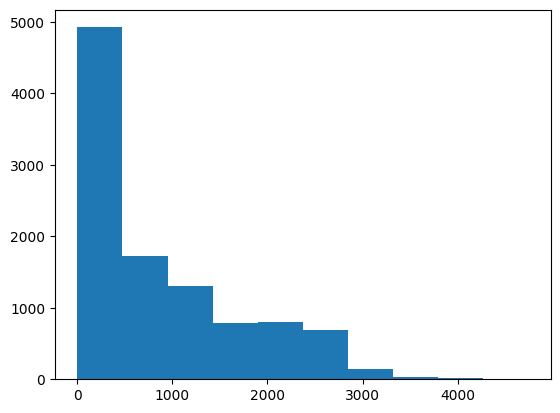

In [71]:
# Preview the column
print(planes["Duration"].head())

# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")

# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)

# Plot a histogram
plt.hist(planes['Duration'])
plt.show()

In [72]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10506.993486              4391
Banglore     9132.225153               2773
Delhi        5157.794118               1219
New Delhi    11738.589499               888
Hyderabad    5025.210280                673
Kolkata      4801.489796                369
Name: count, dtype: int64


In [74]:
seventy_fifth = salaries['Salary_USD'].quantile(0.75)
twenty_fifth = salaries['Salary_USD'].quantile(0.25)
iqr = seventy_fifth - twenty_fifth

upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)
print(f'Upper bound: {upper}, Lower bound: {lower}')

Upper bound: 268223.0, Lower bound: -65105.0


In [ ]:
# Filtering
#    1. relevant columns
#    2. that fulfill condition
salaries[['Experience','Employee_Location','Salary_USD']]\
    [(salaries['Salary_USD'] > upper) | (salaries['Salary_USD'] < lower)]

,Experience,Employee_Location,Salary_USD
25,Executive,US,310321.0
33,Mid,US,429675.0
63,Senior,US,393392.0
97,Mid,US,429675.0
157,Mid,US,403895.0
225,Executive,US,397211.0
252,Executive,US,572900.0
482,Executive,US,309366.0
519,Senior,US,362837.0
523,Senior,US,386708.0


In [80]:
no_outliers = salaries[(salaries['Salary_USD'] > lower) & (salaries['Salary_USD'] < upper)]

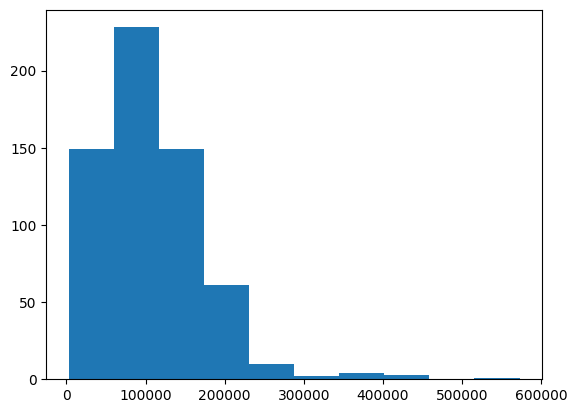

In [81]:
plt.hist(salaries['Salary_USD'])
plt.show()

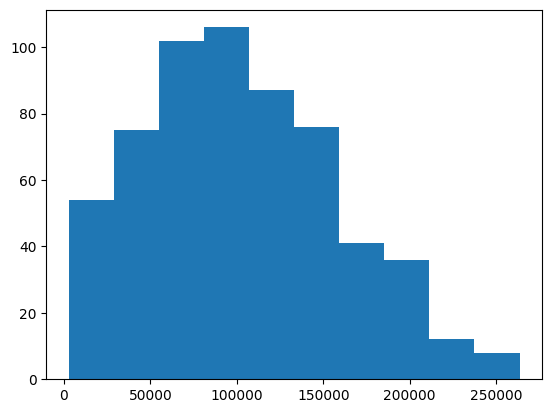

In [82]:
plt.hist(no_outliers['Salary_USD'])
plt.show()